<a href="https://colab.research.google.com/github/PaulChinta/study/blob/main/DM_PA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Kaggle/'

In [14]:
%cd '/content/drive/MyDrive/Kaggle/'

/content/drive/MyDrive/Kaggle


In [15]:
!kaggle datasets download -d samaneheslamifar/facial-emotion-expressions

 94% 113M/121M [00:01<00:00, 88.3MB/s]
100% 121M/121M [00:01<00:00, 84.2MB/s]


In [16]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [18]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [70]:
import numpy as np

In [19]:
train_path='/content/drive/MyDrive/Kaggle/images/train'
validation_path='/content/drive/MyDrive/Kaggle/images/validation'


t=transforms.Compose([transforms.ToTensor()])

In [34]:
train_dataset=torchvision.datasets.ImageFolder(root=train_path,transform=t)
validation_dataset=torchvision.datasets.ImageFolder(root=validation_path,transform=t)
classes = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

In [41]:
[x for x in range(0,5)]

[0, 1, 2, 3, 4]

In [97]:
def blob4maker():
  return [train_dataset[np.random.randint(len(train_dataset))] for x in range(4)]

7519

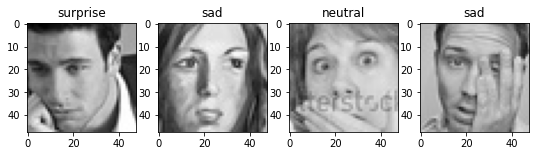

In [105]:
b=blob4maker()
image=[b[x][0] for x in range(len(b))]
label=[b[x][1]for x in range(len(b))]
display(image,label,classes)

In [104]:
train_samples=len(train_dataset)
valid_samples=len(validation_dataset)
print("samples in train set :"+str(train_samples))
print("samples in validation set :"+str(valid_samples))
print("total samples :"+str(train_samples+valid_samples))

samples in train set :28821
samples in validation set :7066
total samples :35887


In [29]:
batch_size=10
trainloader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(validation_dataset,batch_size=batch_size,shuffle=True)

In [88]:
def display(image,label,classes):
  plt.figure(figsize=(9,9))
  plt.subplot(1,4,1)
  plt.imshow(image[0].permute(1, 2, 0))
  plt.title(classes[label[0]])
  plt.subplot(1,4,2)
  plt.imshow(image[1].permute(1, 2, 0))
  plt.title(classes[label[1]])
  plt.subplot(1,4,3)
  plt.imshow(image[2].permute(1, 2, 0))
  plt.title(classes[label[2]])
  plt.subplot(1,4,4)
  plt.imshow(image[3].permute(1, 2, 0))
  plt.title(classes[label[3]])

In [24]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [26]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

AttributeError: ignored

In [35]:
for i, data in enumerate(trainloader, 0):
  # get the inputs; data is a list of [inputs, labels]
  inputs, labels = data
  print(data[1])
  break

tensor([4, 6, 0, 1])


In [36]:
def generator(images,batch_size):
  for i in range(0,len(images),batch_size):
    yield images[i:i+batch_size],labels[i:i+batch_size]
  if(len(images)%batch_size!=0):
    yield images[-(len(images)%batch_size):],labels[-(len(images)%batch_size):]